### INSTRUCTIONS

For this assignment, you must use the AWS VM that has been assigned to you.

Read through the entire framework below once. Note the parts you need to code up.

NOTE: YOU WILL ONLY NEED TO EDIT ONE CELL (TASKS 1.1 - 1.2) FOR THIS ASSIGNMENT AS PER THE INSTRUCTIONS IN THAT CELL.

In [1]:
##### DO NOT EDIT THIS CELL!!!
##### DO NOT IMPORT ANY ADDITIONAL PACKAGES
!pip install shap

In [2]:
##### DO NOT EDIT THIS CELL!!!
##### DO NOT IMPORT ANY ADDITIONAL PACKAGES

from keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to fit the input shape of the neural network
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize the pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert the labels to one-hot encoding
y_train =  to_categorical(y_train)
y_test =  to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


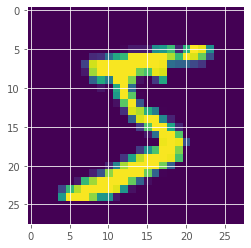

In [3]:
##### DO NOT EDIT THIS CELL!!!

import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Confirm the image.
plt.imshow(x_train[0].reshape(28,28))
plt.show()

In [4]:
##### DO NOT EDIT THIS CELL!!!

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [5]:
##### DO NOT EDIT THIS CELL!!!

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size = 4, activation="relu", input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size = 3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size = 2, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss="mean_squared_error", optimizer="rmsprop", metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          16448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [6]:
##### DO NOT EDIT THIS CELL!!!

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

hist = model.fit(datagen.flow(x_train,y_train, batch_size=128), epochs = 10, validation_data = (x_test,y_test), verbose = 2, steps_per_epoch=x_train.shape[0] // 128 , callbacks=[learning_rate_reduction])

Epoch 1/10
468/468 - 28s - loss: 0.0227 - accuracy: 0.8388 - val_loss: 0.0034 - val_accuracy: 0.9780 - lr: 0.0010 - 28s/epoch - 60ms/step
Epoch 2/10
468/468 - 27s - loss: 0.0079 - accuracy: 0.9482 - val_loss: 0.0028 - val_accuracy: 0.9822 - lr: 0.0010 - 27s/epoch - 59ms/step
Epoch 3/10
468/468 - 27s - loss: 0.0055 - accuracy: 0.9642 - val_loss: 0.0014 - val_accuracy: 0.9907 - lr: 0.0010 - 27s/epoch - 57ms/step
Epoch 4/10
468/468 - 26s - loss: 0.0045 - accuracy: 0.9704 - val_loss: 0.0017 - val_accuracy: 0.9886 - lr: 0.0010 - 26s/epoch - 55ms/step
Epoch 5/10
468/468 - 27s - loss: 0.0038 - accuracy: 0.9757 - val_loss: 0.0012 - val_accuracy: 0.9925 - lr: 0.0010 - 27s/epoch - 59ms/step
Epoch 6/10
468/468 - 27s - loss: 0.0034 - accuracy: 0.9777 - val_loss: 0.0014 - val_accuracy: 0.9910 - lr: 0.0010 - 27s/epoch - 59ms/step
Epoch 7/10
468/468 - 28s - loss: 0.0031 - accuracy: 0.9800 - val_loss: 0.0013 - val_accuracy: 0.9915 - lr: 0.0010 - 28s/epoch - 60ms/step
Epoch 8/10
468/468 - 26s - loss: 0

In [7]:
##### DO NOT EDIT THIS CELL!!!

y_pred = model.predict(x_test)

In [8]:
##### DO NOT EDIT THIS CELL!!!

Y_pred_classes = np.argmax(y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

In [9]:
##### DO NOT EDIT THIS CELL!!!

# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0010009977268055081
Test accuracy: 0.9932000041007996


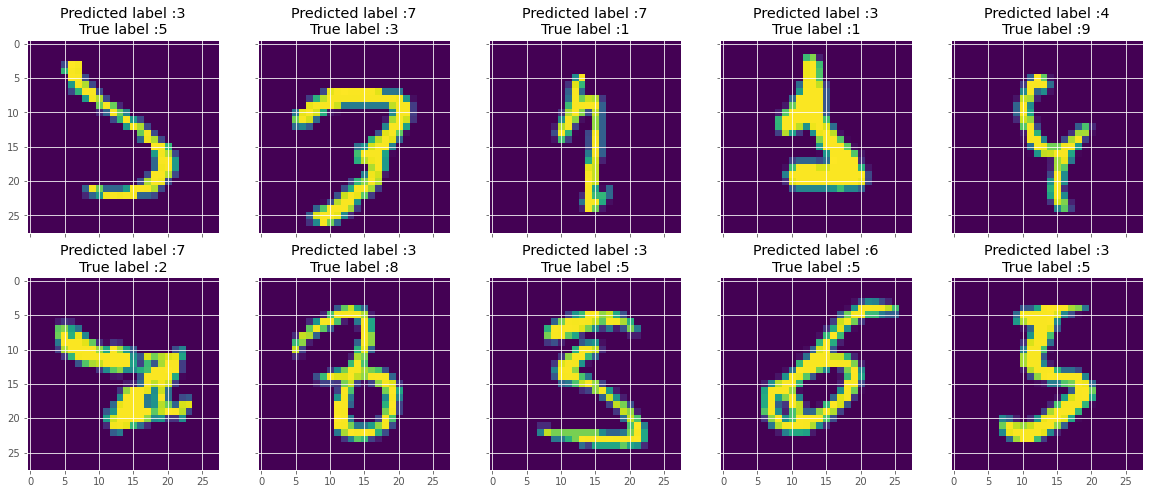

In [10]:
##### DO NOT EDIT THIS CELL!!!

errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = x_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 10 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 5
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(20, 8))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
    plt.show()

Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)
most_important_errors = sorted_dela_errors[-10:]

display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [11]:
##### DO NOT EDIT THIS CELL!!!

!pip install shap

C:\tools\Anaconda3\lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
C:\tools\Anaconda3\lib\site-packages\keras\backend.py:414: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


Predicted label :3
True label :5


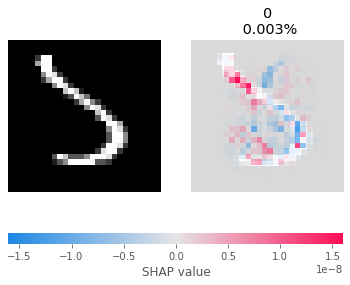

Predicted label :7
True label :3


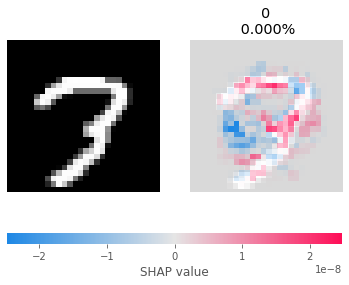

Predicted label :7
True label :1


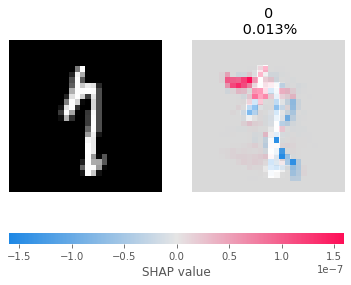

Predicted label :3
True label :1


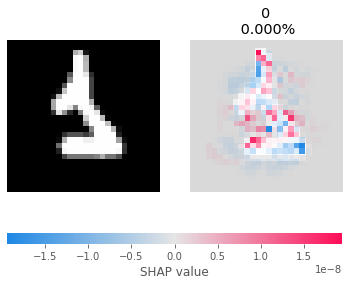

Predicted label :4
True label :9


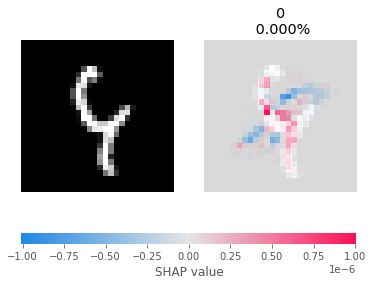

Predicted label :7
True label :2


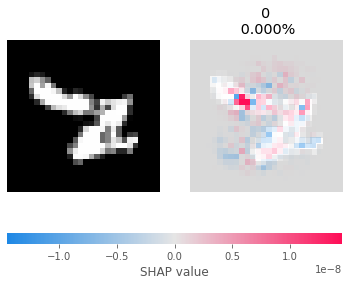

Predicted label :3
True label :8


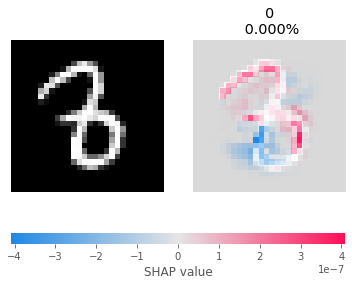

Predicted label :3
True label :5


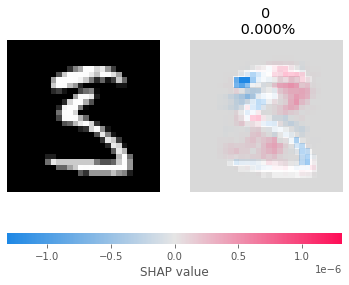

Predicted label :6
True label :5


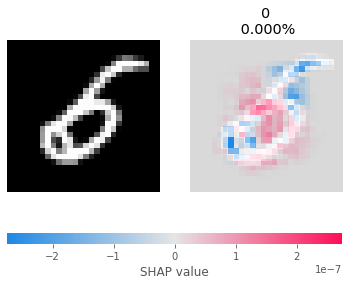

Predicted label :3
True label :5


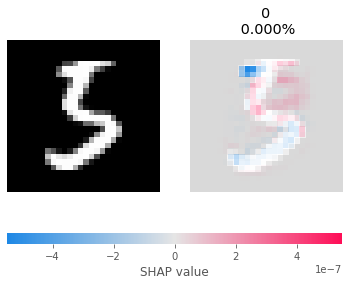

In [12]:
##### THIS IS THE ONLY CELL YOU WILL EDIT PER THE INSTRUCTIONS BELOW

# Import the SHAP library, which is used to explain the output of machine learning models, especially their predictions.
import shap  



### (1.1) YOUR CODE HERE
# Initialize a SHAP explainer object using the 'DeepExplainer' class.
#use this helpful link to learn how to use DeepExplainer class
#https://shap-lrjball.readthedocs.io/en/latest/generated/shap.DeepExplainer.html

#  -Set the first argument to pre-trained neural network model you want to analyze.
#  -Set the second argument to first 1000 items in the training data (x_train[0:1000]).
#  -Assign the name "explainer" to this object
explainer = shap.DeepExplainer(model, x_train[:1000])




# Loop over the indices of the most significant errors.
for i in most_important_errors:
    labels = []
    
    ### (1.2) YOUR CODE HERE
    
    # Compute SHAP values using the explainer object for the mispredicted instances 'i'.
    
    # -Apply function "shap_values" to your explainer object defined above
    # -See this useful documentation to learn more about shap_values function 
    # https://shap-lrjball.readthedocs.io/en/latest/generated/shap.DeepExplainer.html
    
    # -shap_values function should be applied on X_val_errors[[i]]
    # -Name object "shap_values"
    shap_values = explainer.shap_values(X_val_errors[[i]])
    
    
    
    for x in range(10):
        label = str(x) + "\n" + '{:>7.3%}'.format(Y_pred_errors[i][x]) # -Sets the format of string to '{:>7.3%}. -Appends the string to the list.
        labels.append(label) 

    
    
    #Print the predicted and actual labels for the mispredicted example.
    labels_array = np.array(labels) #Converts the list of labels to a NumPy array.
  
    index_names = labels_array.reshape(1, 10)#Reshapes the array to 1x10 format.
    print("Predicted label :{}\nTrue label :{}".format(Y_pred_classes_errors[i],Y_true_errors[i]))

   
    shap.image_plot(shap_values, X_val_errors[[i]], index_names, show=False)  #Visualizes SHAP values
    #Note:
    # -Sets SHAP values to 'shap_values'
    # -Sets pixel values to 'X_val_errors[[i]]'
    # -Sets labels to 'index_names'
    # -sets 'show=False'

    #Display the plot
    plt.show()
   



#### (1.3) Reflect on the output of cell 11. 
#Specifically, look at the image that displays TRUE label 5 predicted as belonging to class 3.
#How do you interpret the blue and red areas of the created explanations (refer to SHAP values in your answer)?

###############
#PASTE YOUR ANSWER HERE (1-3 sentences summarizing the answer are enough)
In the above visualization, red areas signify features that influenced the model to predict the digit as a '3'. The blue areas are features that would have influenced a prediction of '5', the true label
###############
